# 目标检测
- 检测出来图片中的物体的类别和位置
- 图片中物体的位置用BoundingBox
- BoundingBox的坐标有两种表达方式：
    - 一种是左上、右下
    - 另一种是中心坐标和宽高
- 图片在目标检测中与笛卡尔坐标有点不一样，x轴是从左到右，y轴是从上到下
- 图片分类在回答what这个问题，目标检测在同时回答what和where，而且图片中的物体可能会有多个

In [10]:
%matplotlib inline
import torch
from d2l import torch as d2l

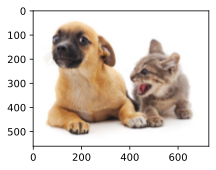

In [8]:
d2l.set_figsize()
img = d2l.plt.imread('./img/catdog.jpg')
d2l.plt.imshow(img);

In [12]:
def box_corner_to_center(boxes):
    x1, y1, x2, y2 = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    w = x2 - x1
    h = y2 - y1
    return torch.stack([(x1 + x2) / 2, (y1 + y2) / 2, w, h], dim=1)
def box_center_to_corner(boxes):
    cx, cy, w, h = boxes[:, 0], boxes[:, 1], boxes[:, 2], boxes[:, 3]
    x1 = cx - w / 2
    y1 = cy - h / 2
    x2 = cx + w / 2
    y2 = cy + h / 2
    return torch.stack([x1, y1, x2, y2], dim=1)

In [13]:
# 定义图片中的boundingBox，用左上、右下的坐标表示
dog_bbox, cat_bbox = [60.0, 45.0, 378.0, 516.0], [400.0, 112.0, 655.0, 468.0]
boxes = torch.tensor((dog_bbox, cat_bbox))
# 看一下两种方式表达的boundingBox是互相抵消的
box_center_to_corner(box_corner_to_center(boxes)) == boxes

tensor([[True, True, True, True],
        [True, True, True, True]])

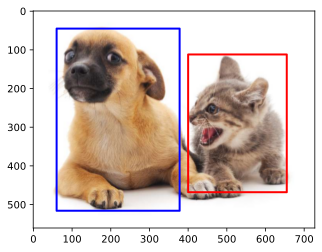

In [14]:
# 手动绘制boundingBox
def bbox_to_rect(bbox, color):
    return d2l.plt.Rectangle(xy=(bbox[0], bbox[1]), width=bbox[2] - bbox[0],
                             height=bbox[3] - bbox[1], fill=False, edgecolor=color, linewidth=2)
fig  = d2l.plt.imshow(img) 
fig.axes.add_patch(bbox_to_rect(dog_bbox, 'blue'))
fig.axes.add_patch(bbox_to_rect(cat_bbox, 'red'))